# ML Answers

- **Answer Set**: Final Project
- **Project Title**: [Heart Disease Health Indicators Dataset](https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset)
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [26]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

import xgboost as skxgb
import sklearn.svm as sksvm
import sklearn.tree as sktree
import sklearn.ensemble as skensemble

import torch as torch
import skorch as skorch

import sklearn.base as skbase
import sklearn.utils as skutils
import sklearn.metrics as skmetrics
import sklearn.pipeline as skpipeline
import sklearn.preprocessing as skprocessing
import sklearn.model_selection as skselection

sk.set_config(display="diagram")

### Dataset

Now we can load our dataset:

In [27]:
data_frame = pd.read_csv("../lib/heart_disease_health_indicators_BRFSS2015.csv")
data_frame = skutils.shuffle(data_frame)

data_label = data_frame["HeartDiseaseorAttack"]
data_frame = data_frame.drop(["HeartDiseaseorAttack"], axis=1)

data_features = data_frame.to_numpy()
data_labels = data_label.to_numpy()

data_labels = np.array(data_labels, dtype=np.int32)

train_features, test_features, train_labels, test_labels = skselection.train_test_split(
    data_features, 
    data_labels, 
    test_size=0.3, 
    random_state=313
)

train_features = np.array(train_features, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.int64)
test_features = np.array(test_features, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.int64)

data_frame

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
24429,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,5.0,6.0
184769,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,5.0,6.0
36001,1.0,0.0,1.0,31.0,0.0,0.0,2.0,0.0,1.0,1.0,...,1.0,0.0,5.0,7.0,30.0,1.0,1.0,9.0,4.0,4.0
125482,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,5.0,7.0
39772,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125151,1.0,1.0,1.0,32.0,0.0,0.0,2.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
143631,1.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,3.0
56099,1.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,0.0,3.0,0.0,0.0,9.0,4.0,8.0
189585,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,6.0,6.0,8.0


---

## Problem

In this problem, we are going to fit seven types of models, before training each model, we will do a `Grid Search` with `Cross Validation` to find the best hyper parameters for the model.

### Decision Tree

In this section, we will define a pipeline that first will **Standardize** records, then it will use **Decision Tree** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

In [28]:
decision_tree_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", sktree.DecisionTreeClassifier())
    ]),
    param_grid={
        "classifier__criterion": ["gini", "entropy"],
        "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

decision_tree_predicts = decision_tree_model.predict(test_features)

decision_tree_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 50, 100, None]},
             scoring='accuracy')

### Random Forest

In this section, we will define a pipeline that first will **Standardize** records, then it will use **Random Forest** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

In [29]:
random_forest_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", skensemble.RandomForestClassifier())
    ]),
    param_grid={
        "classifier__criterion": ["gini", "entropy"],
        "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

random_forest_predicts = random_forest_model.predict(test_features)

random_forest_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 50, 100, None]},
             scoring='accuracy')

### XGBoost

In this section, we will define a pipeline that first will **Standardize** records, then it will use **XGBoost** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

In [30]:
skxgb.set_config(verbosity=0)

xgboost_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", skxgb.XGBClassifier(use_label_encoder=False))
    ]),
    param_grid={},
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

xgboost_predicts = xgboost_model.predict(test_features)

xgboost_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      use_label_encoder=False,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1, param_grid={}, scoring='accuracy')

### MLP

In this section, we will define a pipeline that first will **Standardize** records, then it will use **Multi Layer Perceptron** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

We will use `pytorch` and `skorch` libraries for **Neural Network** classification

In [31]:
class MLP(torch.nn.Module):
    def __init__(self, layers):
        super().__init__()
        torch_layers = []
        input_layers = 21

        for layer in layers:
            torch_layers.append(torch.nn.Linear(input_layers, layer))
            torch_layers.append(torch.nn.ReLU())
            input_layers = layer
        
        torch_layers.append(torch.nn.Linear(input_layers, 2))
        torch_layers.append(torch.nn.Softmax(dim=-1))

        self.layers = torch.nn.Sequential(*torch_layers)
    
    def forward(self, X):
        return self.layers(X)

mlp_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("classifier", skorch.NeuralNetClassifier(MLP, verbose=False))
    ]),
    param_grid={
        "classifier__module__layers": [(10,), (10, 60)],
        "classifier__lr": [0.01],
        "classifier__max_epochs": [5],
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

mlp_predicts = mlp_model.predict(test_features)

mlp_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier',
                                        <class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.MLP'>,
))]),
             n_jobs=-1,
             param_grid={'classifier__lr': [0.01],
                         'classifier__max_epochs': [5],
                         'classifier__module__layers': [(10,), (10, 60)]},
             scoring='accuracy')

### AutoEncoder

In this section, we will define a pipeline that first will **Standardize** records, then it will use **Auto Encoder** to encode records and then it will use **Random Forest** model inorder to classify outputs of auto encoder

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

We will use `pytorch` and `skorch` libraries for **Neural Network** classification

In [32]:
class AutoEncoder(torch.nn.Module):
    def __init__(self, layers):
        super().__init__()
        encoder_layers = []
        decoder_layers = []
        input_layers = 21

        for layer in layers:
            encoder_layers.insert(-1, torch.nn.ReLU())
            encoder_layers.insert(-1, torch.nn.Linear(input_layers, layer))
            decoder_layers.insert(0, torch.nn.ReLU())
            decoder_layers.insert(0, torch.nn.Linear(layer, input_layers))
            input_layers = layer

        self.encoder = torch.nn.Sequential(*encoder_layers)
        self.decoder = torch.nn.Sequential(*decoder_layers)
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return (encoded, decoded)

class NeuralNetTransformer(skorch.NeuralNet, skbase.TransformerMixin):
    def get_loss(self, y_pred, y_true, X, **kwargs):
        (_, decoded) = y_pred
        return super().get_loss(decoded, y_true=X, X=X, **kwargs)
    
    def transform(self, X):
        (encoded, _) = self.forward(X)
        return encoded

auto_encoder_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("standardizer", skprocessing.StandardScaler()),
        ("autoencoder", NeuralNetTransformer(AutoEncoder, criterion=torch.nn.MSELoss, verbose=False)),
        ("classifier", sktree.DecisionTreeClassifier())
    ]),
    param_grid={
        "autoencoder__module__layers": [(10,), (10, 60)],
        "autoencoder__lr": [0.01],
        "autoencoder__max_epochs": [5],
        "classifier__criterion": ["entropy"],
        "classifier__max_depth": [10, 50]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

auto_encoder_predicts = auto_encoder_model.predict(test_features)

auto_encoder_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('autoencoder',
                                        <class '__main__.NeuralNetTransformer'>[uninitialized](
  module=<class '__main__.AutoEncoder'>,
)),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'autoencoder__lr': [0.01],
                         'autoencoder__max_epochs': [5],
                         'autoencoder__module__layers': [(10,), (10, 60)],
                         'classifier__criterion': ['entropy'],
                         'classifier__max_depth': [10, 50]},
             scoring='accuracy')

---

### Results

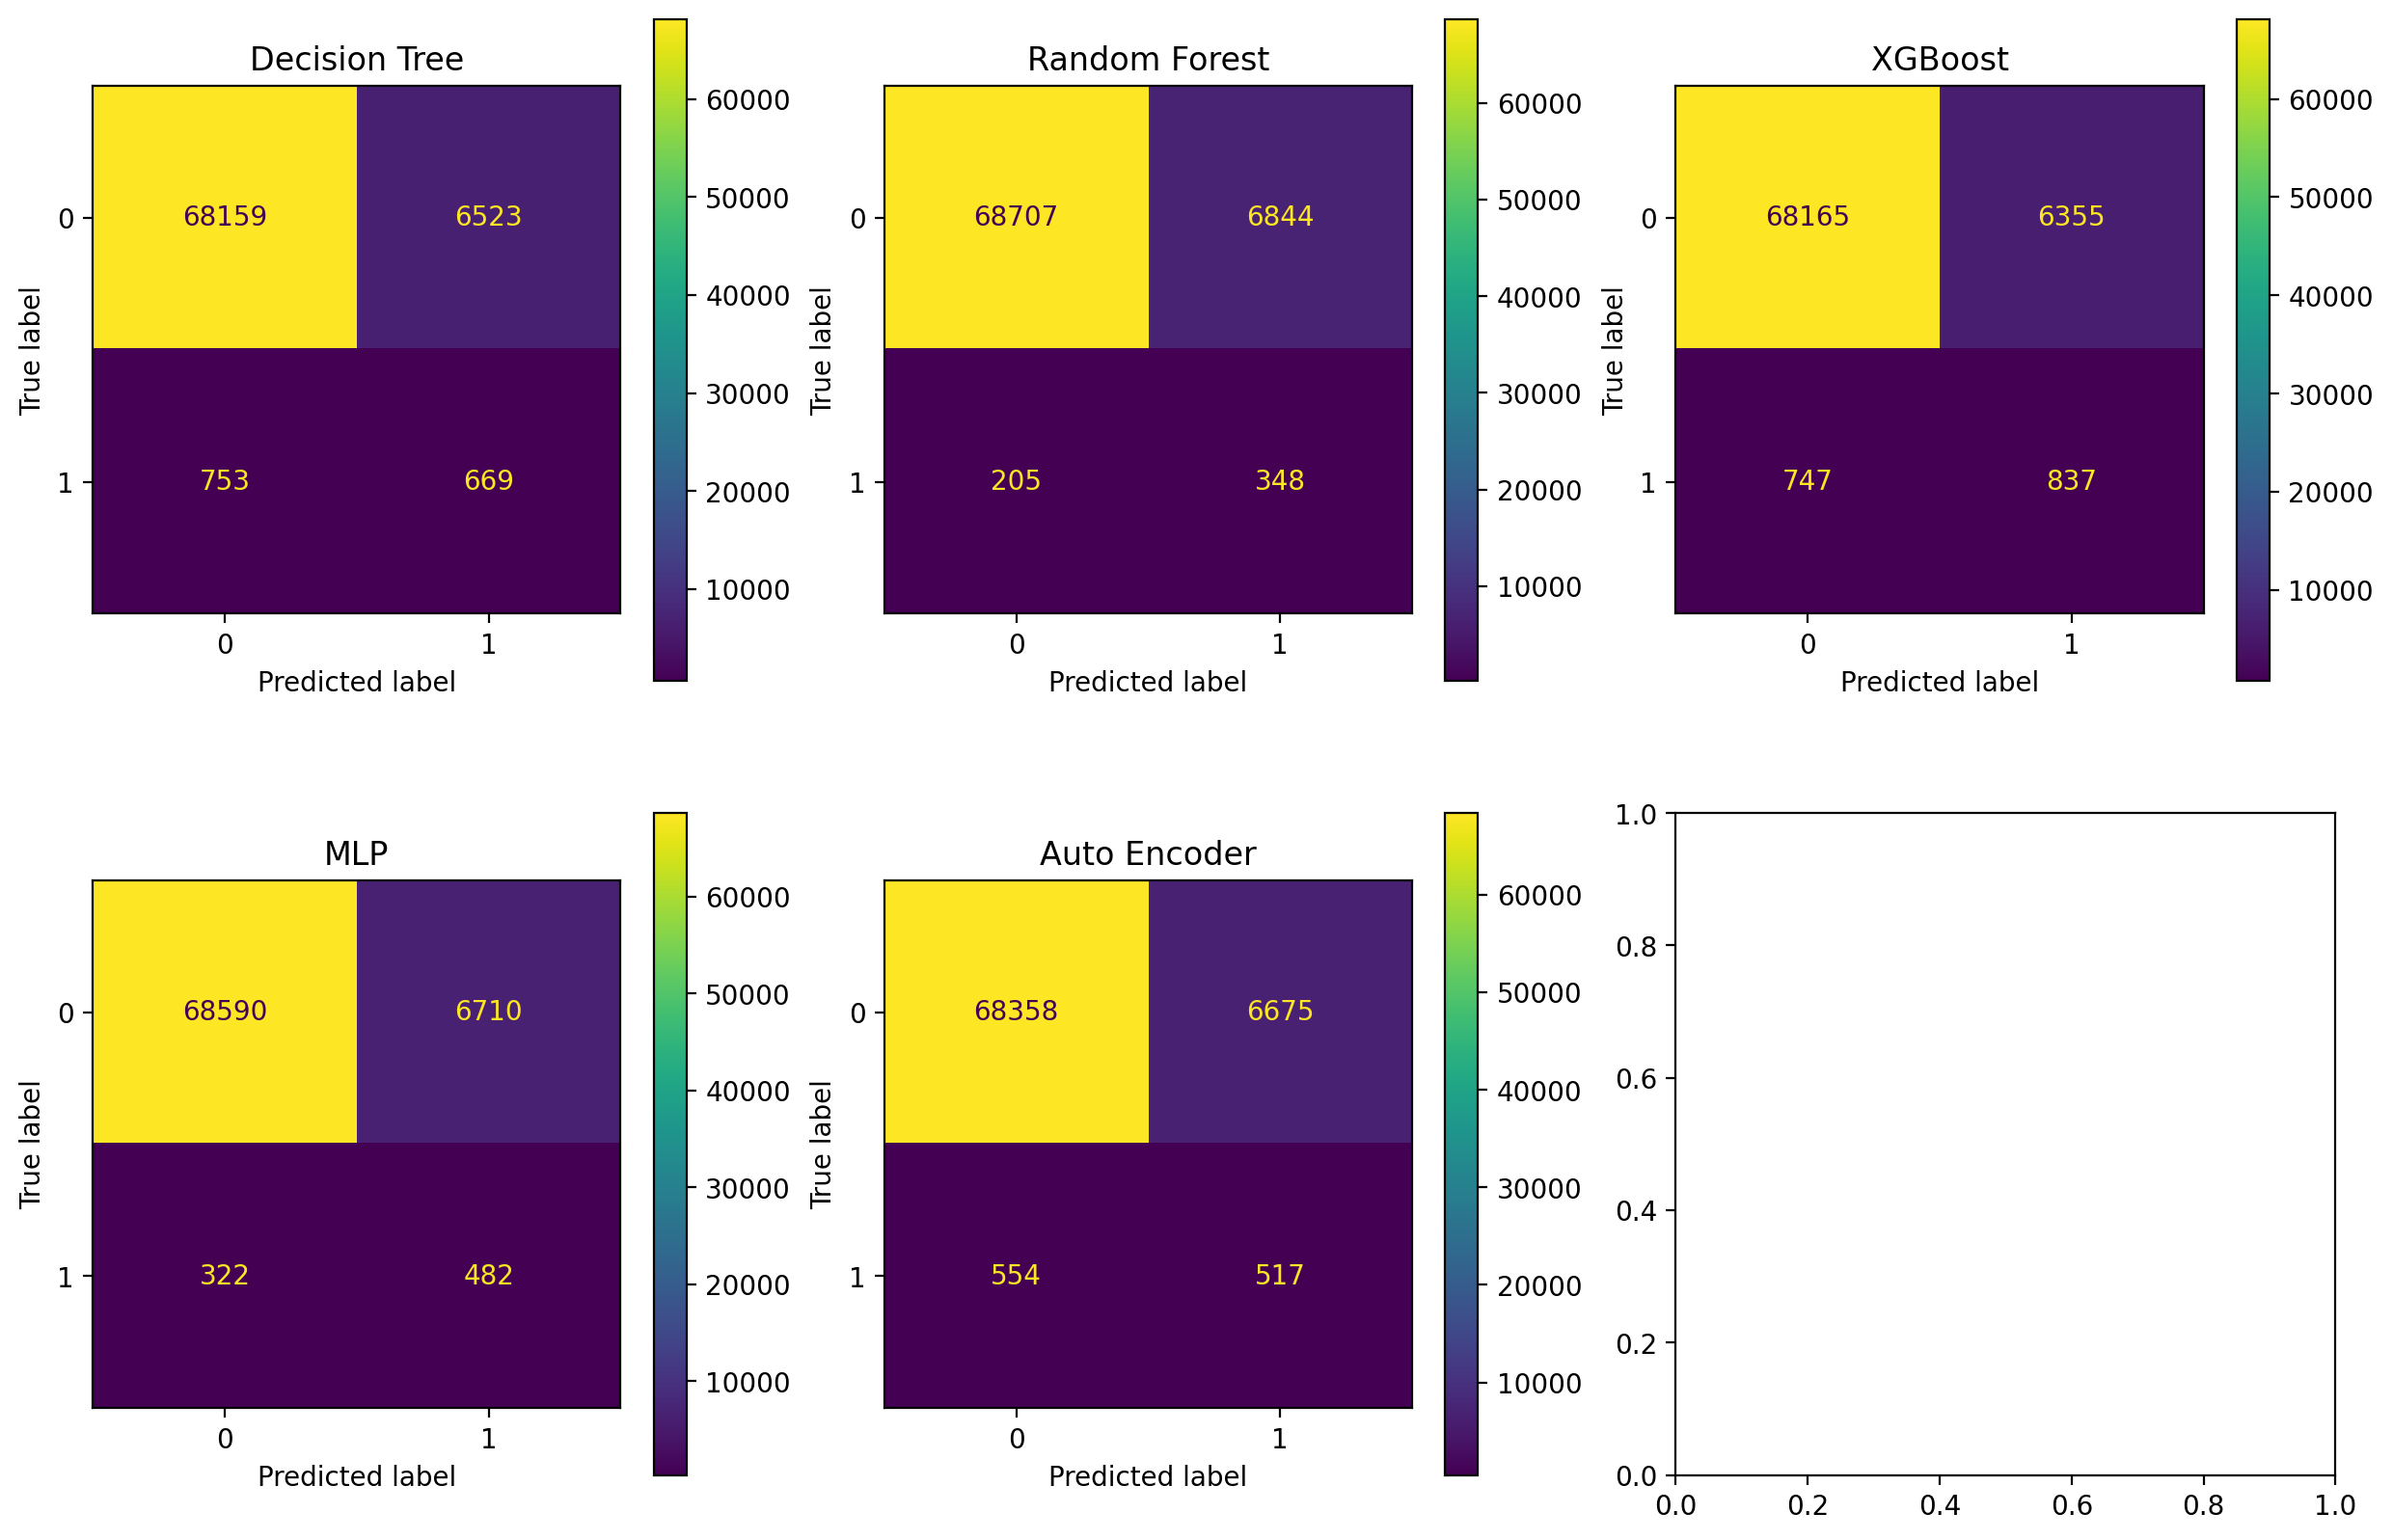

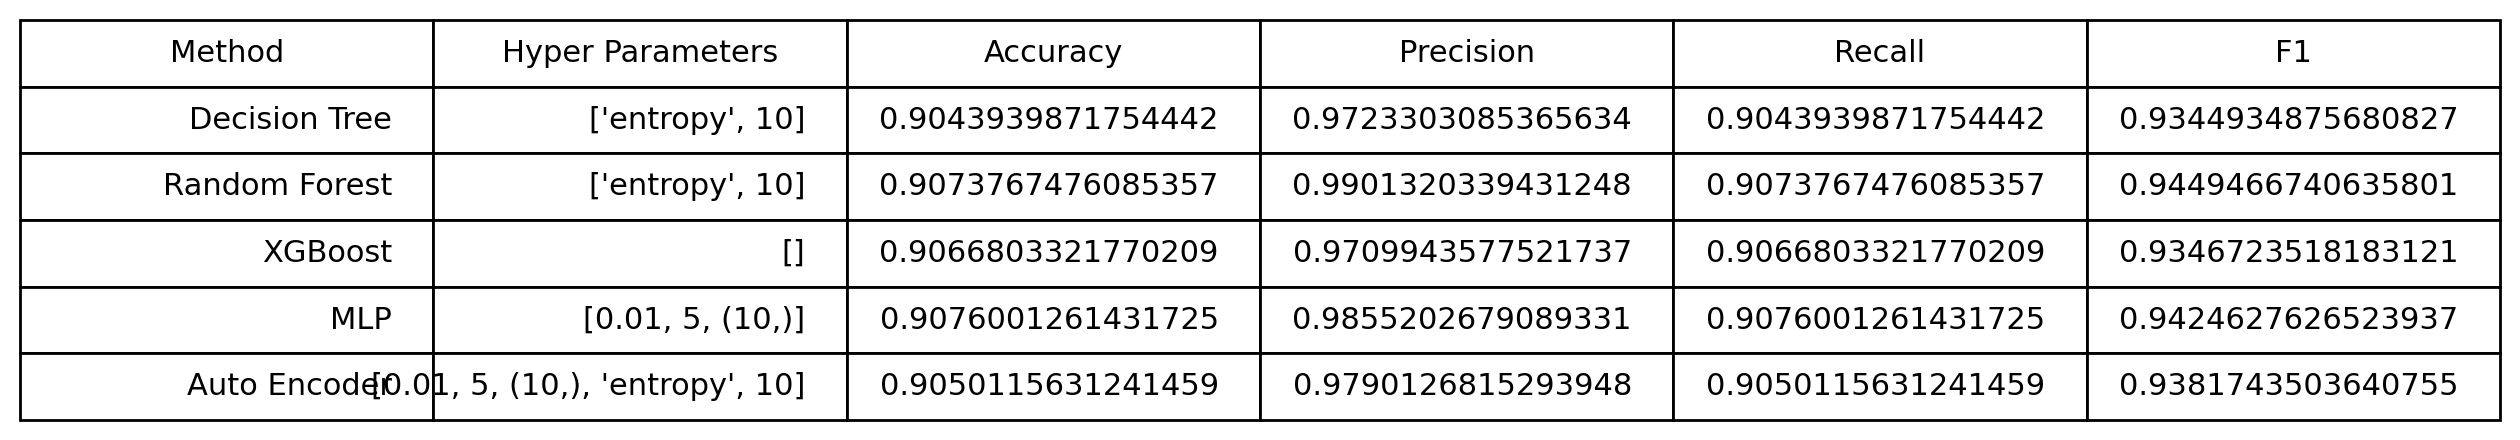

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10), dpi=200)
axes = axes.flatten()

axes[0].set_title("Decision Tree")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    decision_tree_predicts,
    test_labels,
    ax=axes[0]
)

axes[1].set_title("Random Forest")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    random_forest_predicts,
    test_labels,
    ax=axes[1]
)

axes[2].set_title("XGBoost")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    xgboost_predicts,
    test_labels,
    ax=axes[2]
)

axes[3].set_title("MLP")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    mlp_predicts,
    test_labels,
    ax=axes[3]
)

axes[4].set_title("Auto Encoder")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    auto_encoder_predicts,
    test_labels,
    ax=axes[4]
)

plt.show()

plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Decision Tree",
        list(decision_tree_model.best_params_.values()),
        skmetrics.accuracy_score(decision_tree_predicts, test_labels),
        skmetrics.precision_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "Random Forest",
        list(random_forest_model.best_params_.values()),
        skmetrics.accuracy_score(random_forest_predicts, test_labels),
        skmetrics.precision_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(random_forest_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "XGBoost",
        list(xgboost_model.best_params_.values()),
        skmetrics.accuracy_score(xgboost_predicts, test_labels),
        skmetrics.precision_score(xgboost_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(xgboost_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(xgboost_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "MLP",
        list(mlp_model.best_params_.values()),
        skmetrics.accuracy_score(mlp_predicts, test_labels),
        skmetrics.precision_score(mlp_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(mlp_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(mlp_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "Auto Encoder",
        list(auto_encoder_model.best_params_.values()),
        skmetrics.accuracy_score(auto_encoder_predicts, test_labels),
        skmetrics.precision_score(auto_encoder_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(auto_encoder_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(auto_encoder_predicts, test_labels, average="weighted", zero_division=True)
    ]
], colLabels=["Method", "Hyper Parameters", "Accuracy", "Precision", "Recall", "F1"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

As we can see all models are a good fit of the data set, data set is too large so **Neural Network** based models are good.

- **Decision Tree**: model is `good fit` with `low learning time`
- **Random Forest**: model is `good fit` with `very high learning time`
- **XGBoost**: model is `good fit` with `high learning time`
- **MLP**: model is `good fit` with `low learning time`
- **Auto Encoder**: model is `good fit` with `high learning time`

---